In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzA3'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
# Data handling and manipulation
import pandas as pd
import numpy as np

# Implementing and selecting models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from itertools import combinations
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# For advanced visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Show computation time
import time

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Set Seaborn theme
sns.set_theme(style = "white")

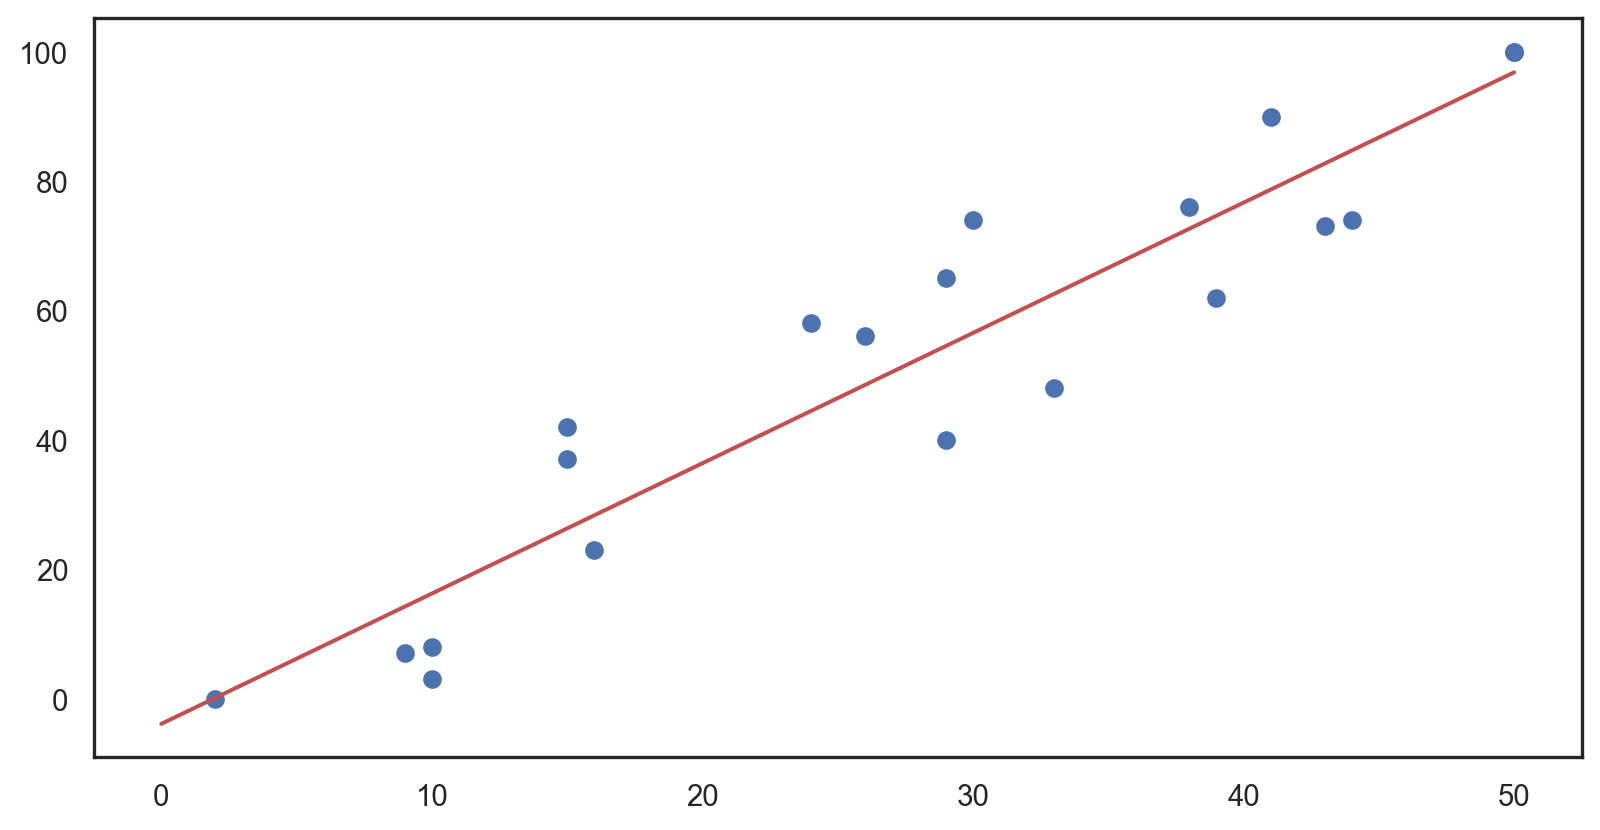

In [3]:
#| echo: false
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)
x = student_data.hours
y = student_data.test_results
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
hours_studied = 20
predict(hours_studied)
x_lin_reg = range(0, 51)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

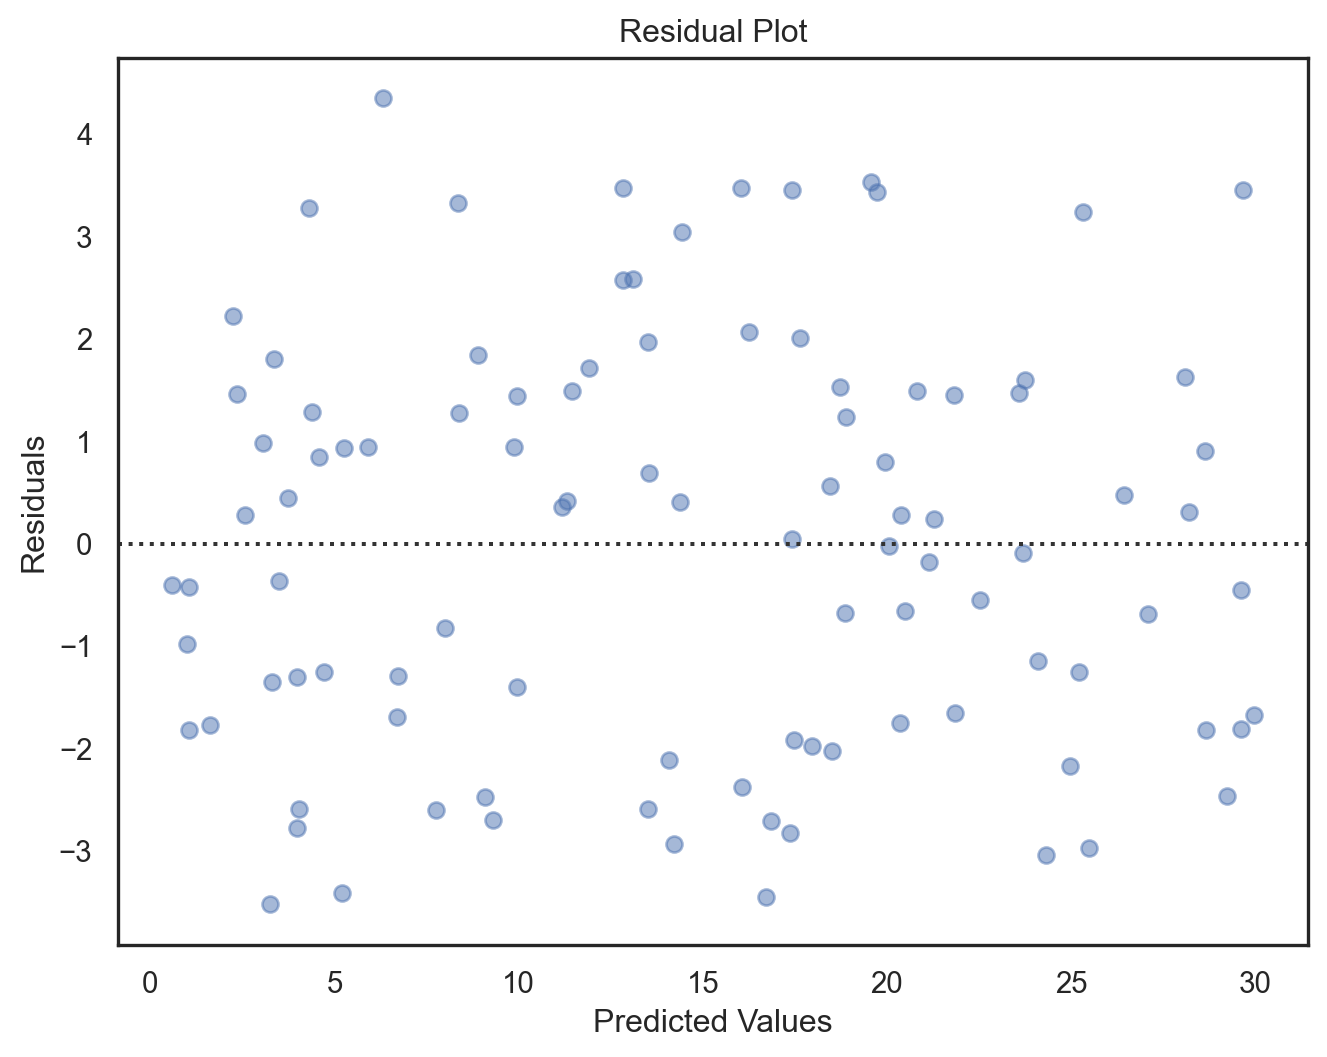

In [4]:
#| echo: false
# Simulating data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random values for X
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with noise for Y

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting values
y_pred = model.predict(X)

# Calculating residuals
residuals = y - y_pred

# Creating residual plot using seaborn
plt.figure(figsize = (8, 6))
sns.residplot(x = y_pred, y = residuals, scatter_kws = {'alpha':0.5})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [5]:
elmhurst = pd.read_csv("data/elmhurst.csv")

In [6]:
elmhurst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   family_income  50 non-null     float64
 1   gift_aid       50 non-null     float64
 2   price_paid     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [7]:
elmhurst.describe()

,family_income,gift_aid,price_paid
count,50.000000,50.000000,50.000000
mean,101.778520,19.935560,19.544440
std,63.206451,5.460581,5.979759
min,0.000000,7.000000,8.530000
25%,64.079000,16.250000,15.000000
50%,88.061500,20.470000,19.500000
75%,137.174000,23.515000,23.630000
max,271.974000,32.720000,35.000000


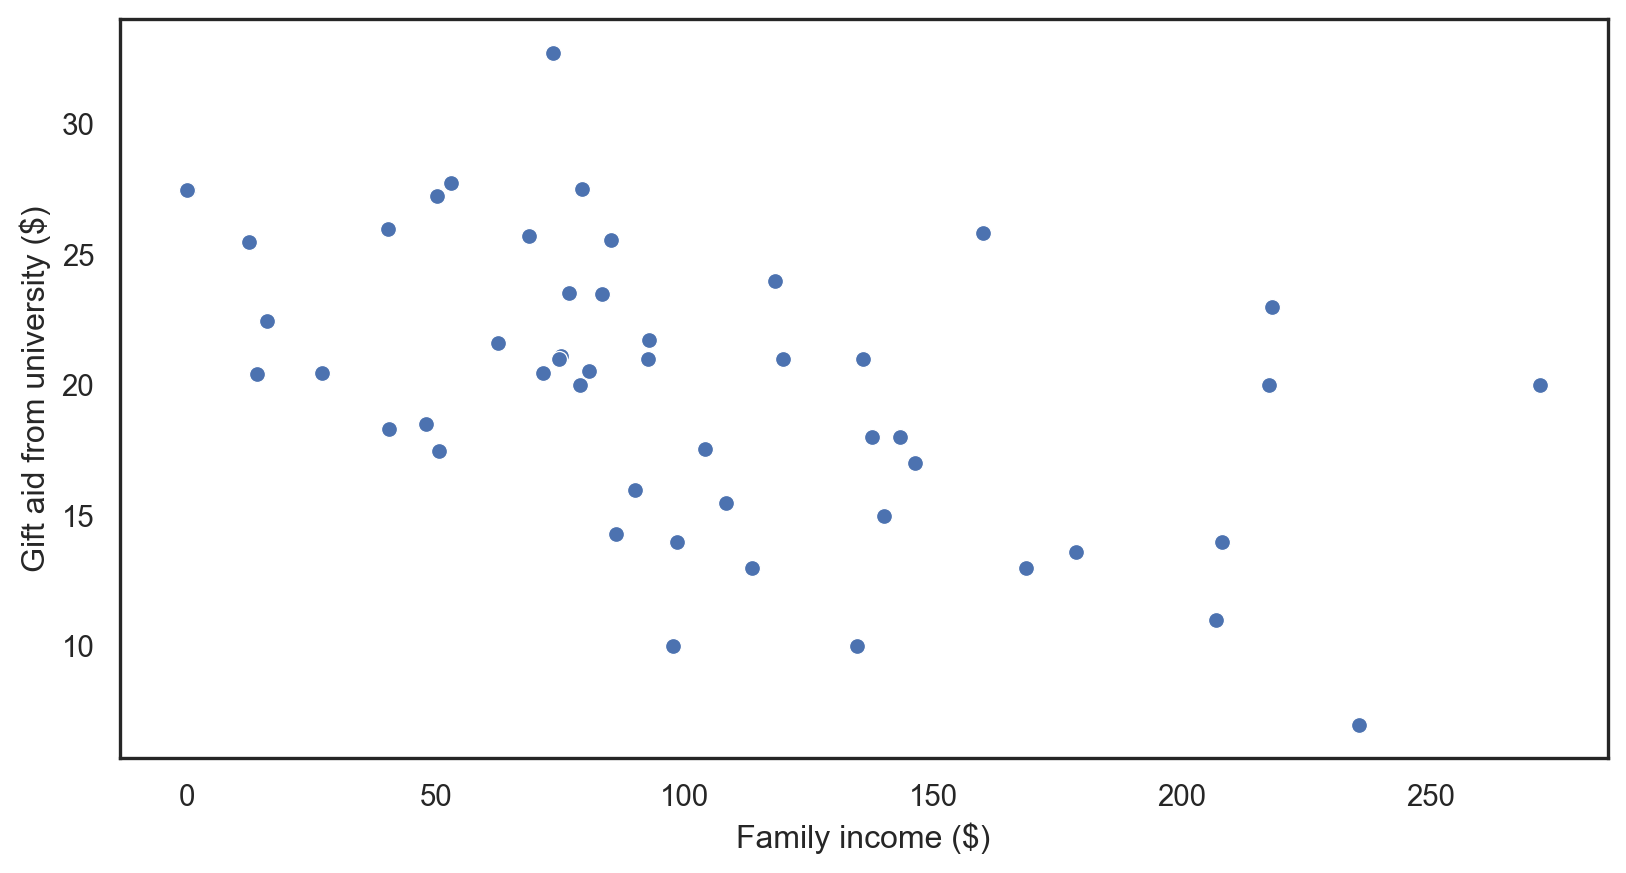

In [8]:
sns.scatterplot(data = elmhurst, x = "family_income", y = "gift_aid")
plt.xlabel("Family income ($)")
plt.ylabel("Gift aid from university ($)")
plt.show()

In [9]:
#| code-fold: true
#| code-line-numbers: "|1,2|4|5|7|9"
X = elmhurst['family_income']  # Independent variable
y = elmhurst['gift_aid']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_with_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_with_const).fit()

model_summary2 = model.summary2()
print(model_summary2)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.205   
Dependent Variable: gift_aid         AIC:                241.3545
Date:               2025-08-20 11:30 BIC:                244.7323
No. Observations:   40               Log-Likelihood:     -118.68 
Df Model:           1                F-statistic:        11.05   
Df Residuals:       38               Prob (F-statistic): 0.00197 
R-squared:          0.225            Scale:              23.273  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const             24.5170   1.4489 16.9216 0.0000 21.5839 27.4500
family_income     -0.0398   0.0120 -3.3238 0.0020 -0.0640 -0.0156
-----------------------------------------------------------------
Omnibus:              0.057        Durbin-Watson:           2.277
Prob(Omnibus):        0.972

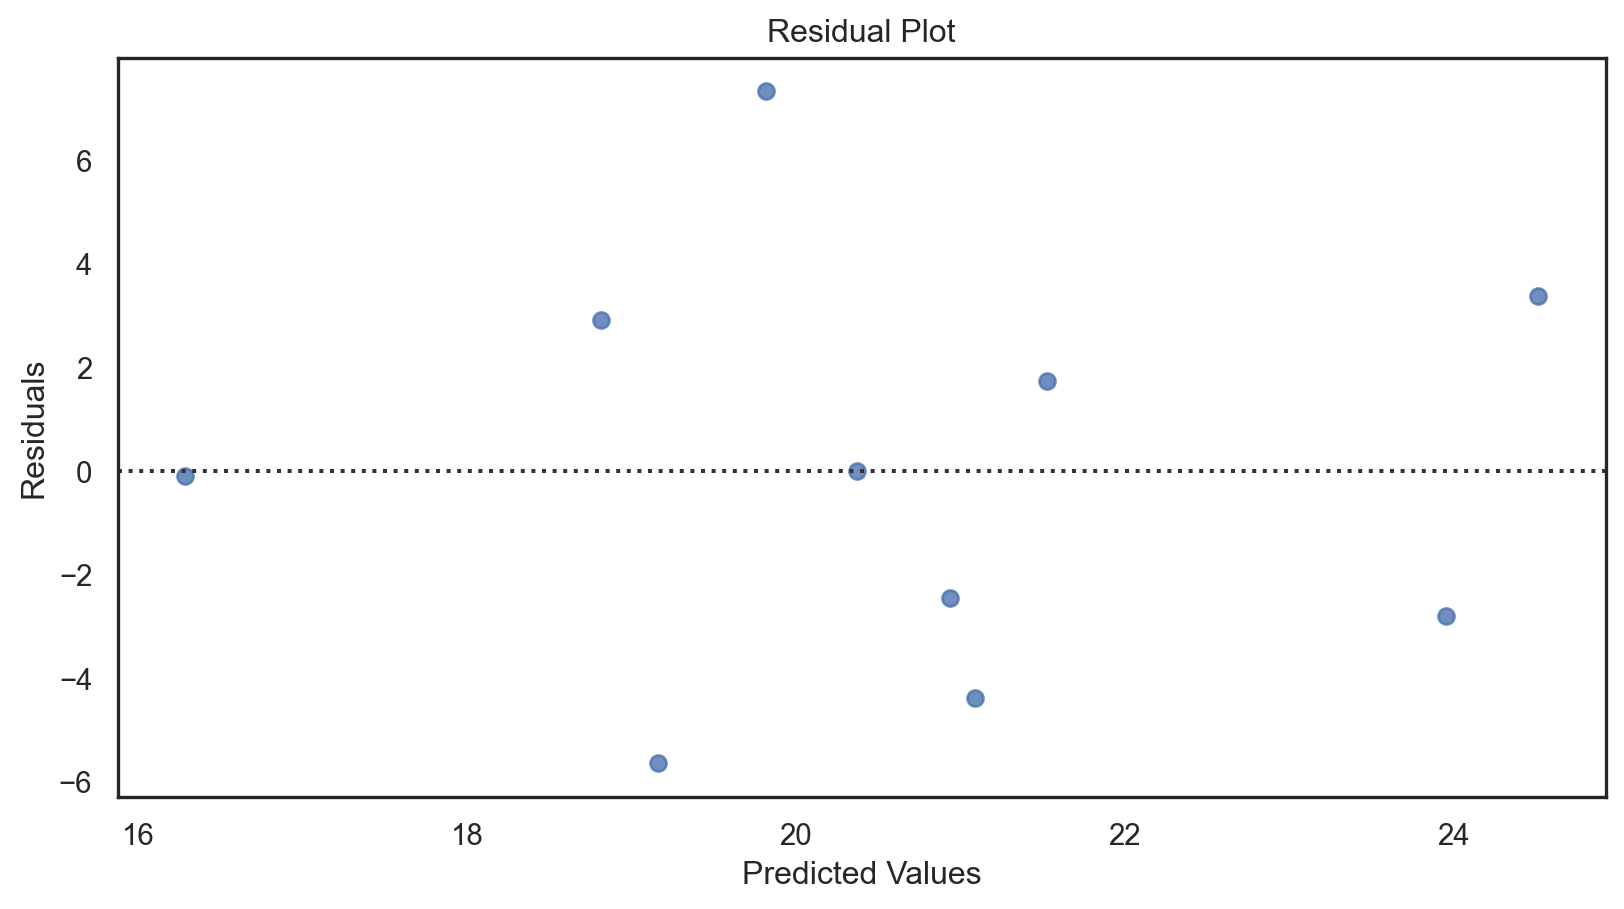

In [10]:
#| code-fold: true
#| code-line-numbers: "|1|2|3|5-9"
X_test_with_const = sm.add_constant(X_test)
predictions = model.predict(X_test_with_const)
residuals = y_test - predictions

sns.residplot(x = predictions, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

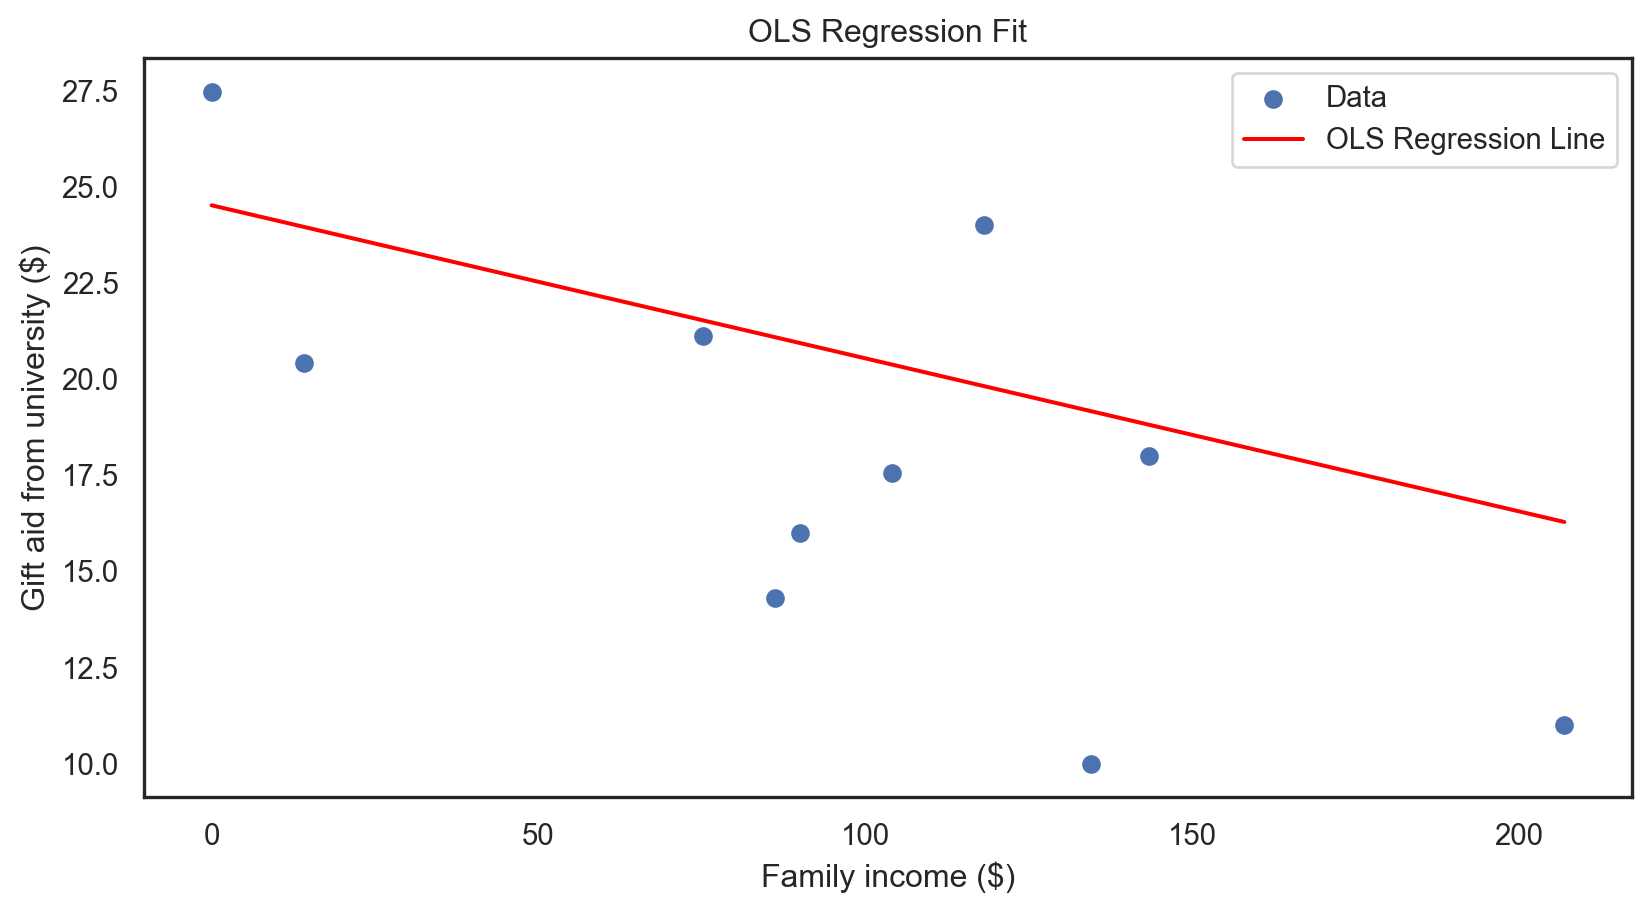

In [11]:
#| code-fold: true
#| code-line-numbers: "|1|3,4|5|7-11"
plt.scatter(X_test, y_test, label = 'Data')

line_x = np.linspace(X_test.min(), X_test.max(), 100)
line_y = model.predict(sm.add_constant(line_x))
plt.plot(line_x, line_y, color = 'red', label = 'OLS Regression Line')

plt.xlabel("Family income ($)")
plt.ylabel("Gift aid from university ($)")
plt.title('OLS Regression Fit')
plt.legend()
plt.show()

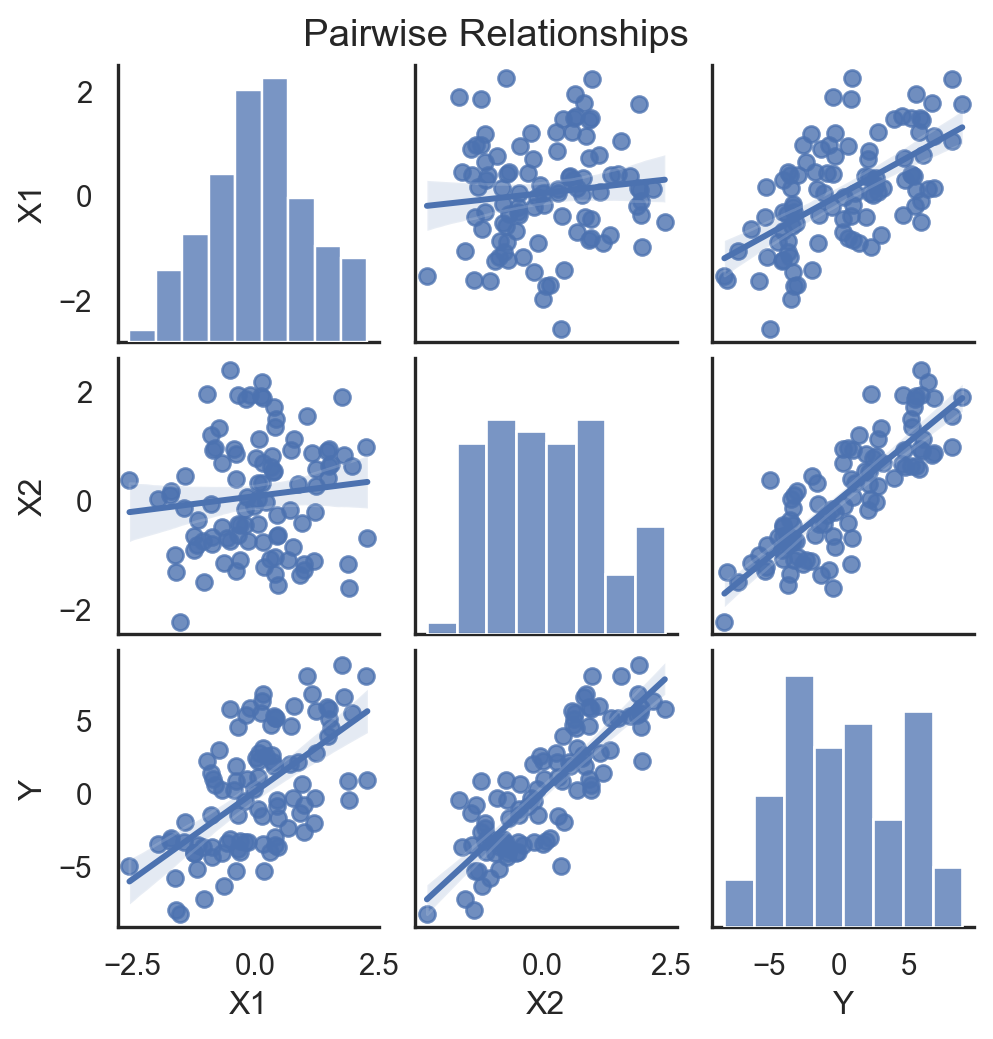

In [12]:
#| echo: false
# Generating synthetic data
np.random.seed(0)
X1 = np.random.randn(100)
X2 = np.random.randn(100)
Y = 2 * X1 + 3 * X2 + np.random.randn(100)  # Y depends on X1 and X2

# Creating a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

# Create an interaction term
df['X1_X2'] = df['X1'] * df['X2']

# Creating the first plot for pairwise relationships
sns.pairplot(df[['X1', 'X2', 'Y']], kind='reg', height=1.75)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

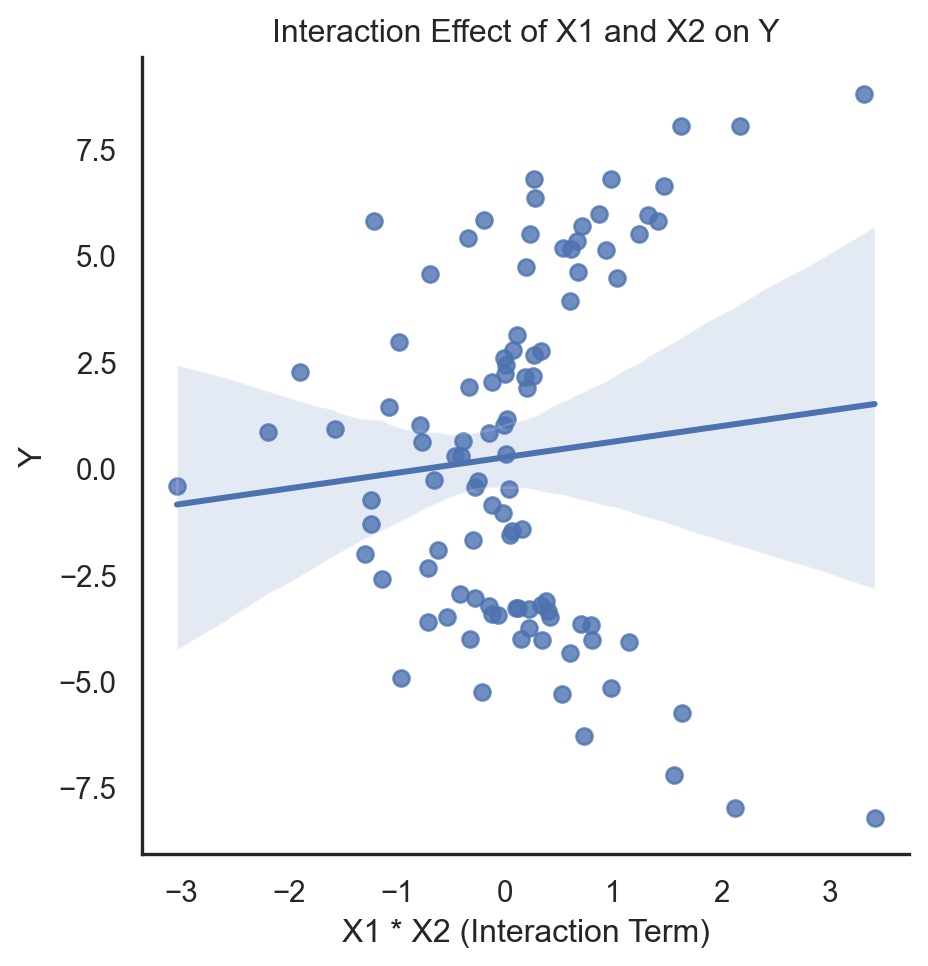

In [13]:
#| echo: false
sns.lmplot(x='X1_X2', y='Y', data=df)
plt.xlabel('X1 * X2 (Interaction Term)')
plt.ylabel('Y')
plt.title('Interaction Effect of X1 and X2 on Y')
plt.show()

In [14]:
loans = pd.read_csv("data/loans.csv")
loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [16]:
loans.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


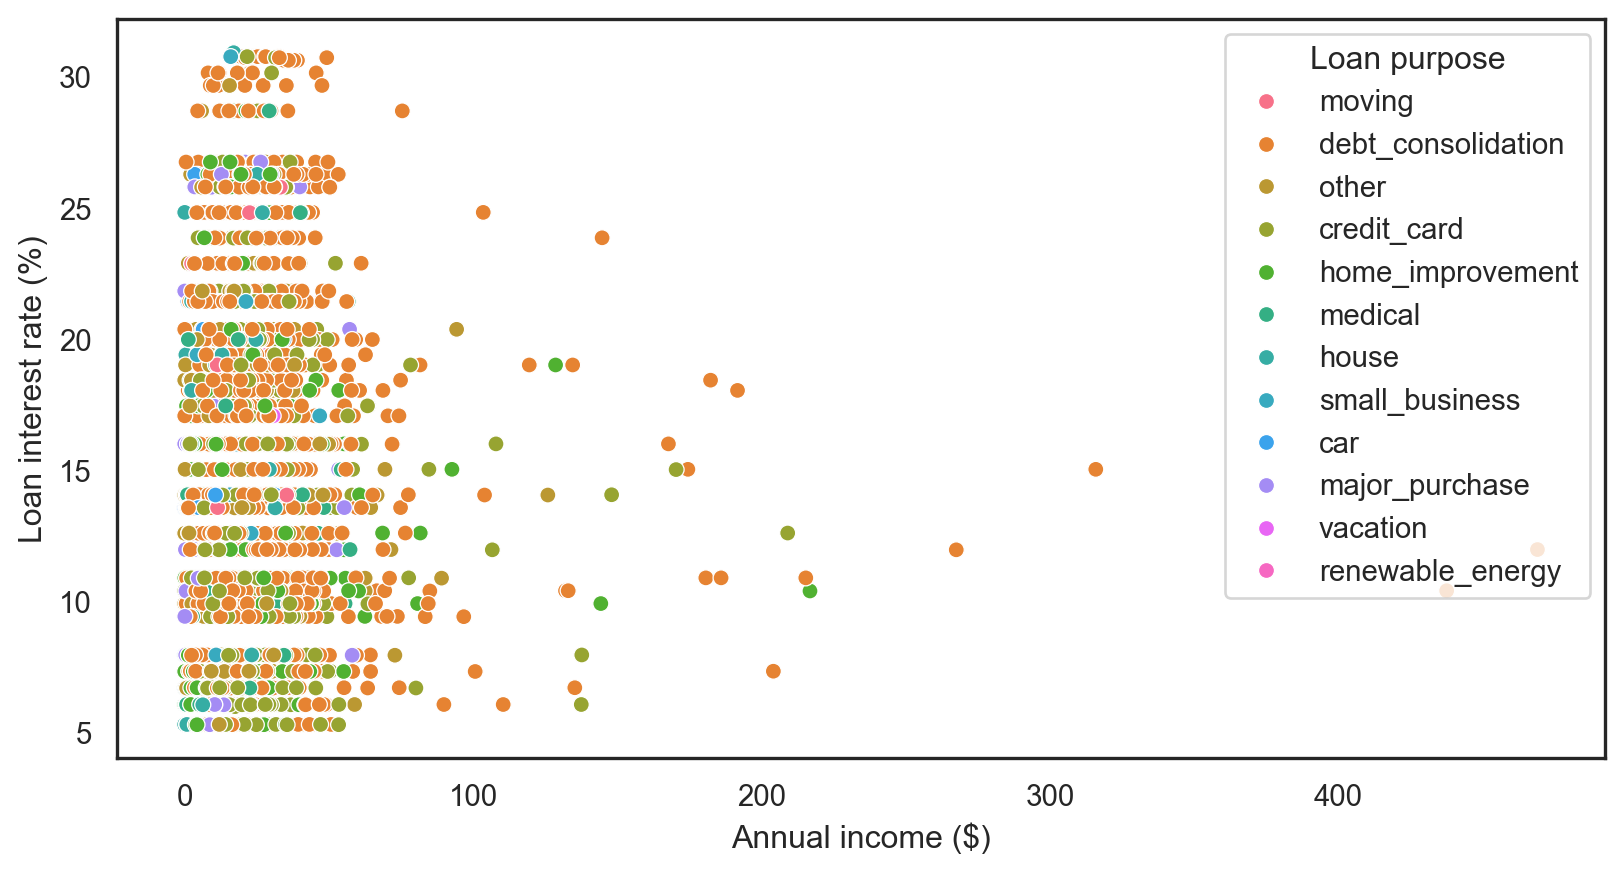

In [17]:
#| code-fold: true
sns.scatterplot(data = loans, x = "debt_to_income", y = "interest_rate", hue = "loan_purpose")
plt.xlabel("Annual income ($)")
plt.ylabel("Loan interest rate (%)")
plt.legend(title = "Loan purpose")
plt.show()

In [18]:
loans['credit_util'] = loans['total_credit_utilized'] / loans['total_credit_limit']
loans['bankruptcy'] = (loans['public_record_bankrupt'] != 0).astype(int)
loans['verified_income'] = loans['verified_income'].astype('category').cat.remove_unused_categories()
loans = loans.rename(columns = {'inquiries_last_12m': 'credit_checks'})

loans = loans[['interest_rate', 'verified_income', 'debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'issue_month']]

In [19]:
#| code-fold: true
X = loans[['verified_income', 'debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'issue_month']]  
y = loans['interest_rate']  
X = pd.get_dummies(X, columns = ['verified_income', 'issue_month'], drop_first = True)
X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

X_train_with_const = X_train_with_const.astype(int)
X_test_with_const = X_test_with_const.astype(int)

model = sm.OLS(y_train, X_train_with_const).fit()

model_summary2 = model.summary2()
print(model_summary2)

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.191     
Dependent Variable:      interest_rate       AIC:                   46653.7930
Date:                    2025-08-20 11:30    BIC:                   46723.6650
No. Observations:        8000                Log-Likelihood:        -23317.   
Df Model:                9                   F-statistic:           210.4     
Df Residuals:            7990                Prob (F-statistic):    0.00      
R-squared:               0.192               Scale:                 19.937    
------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------
const                            4.0713   0.2319 17.5583 0.0000  3.6167 4.5258
debt_to_income                   0.0330   0.0033  9.8715 0.0000  0.0265 0.03

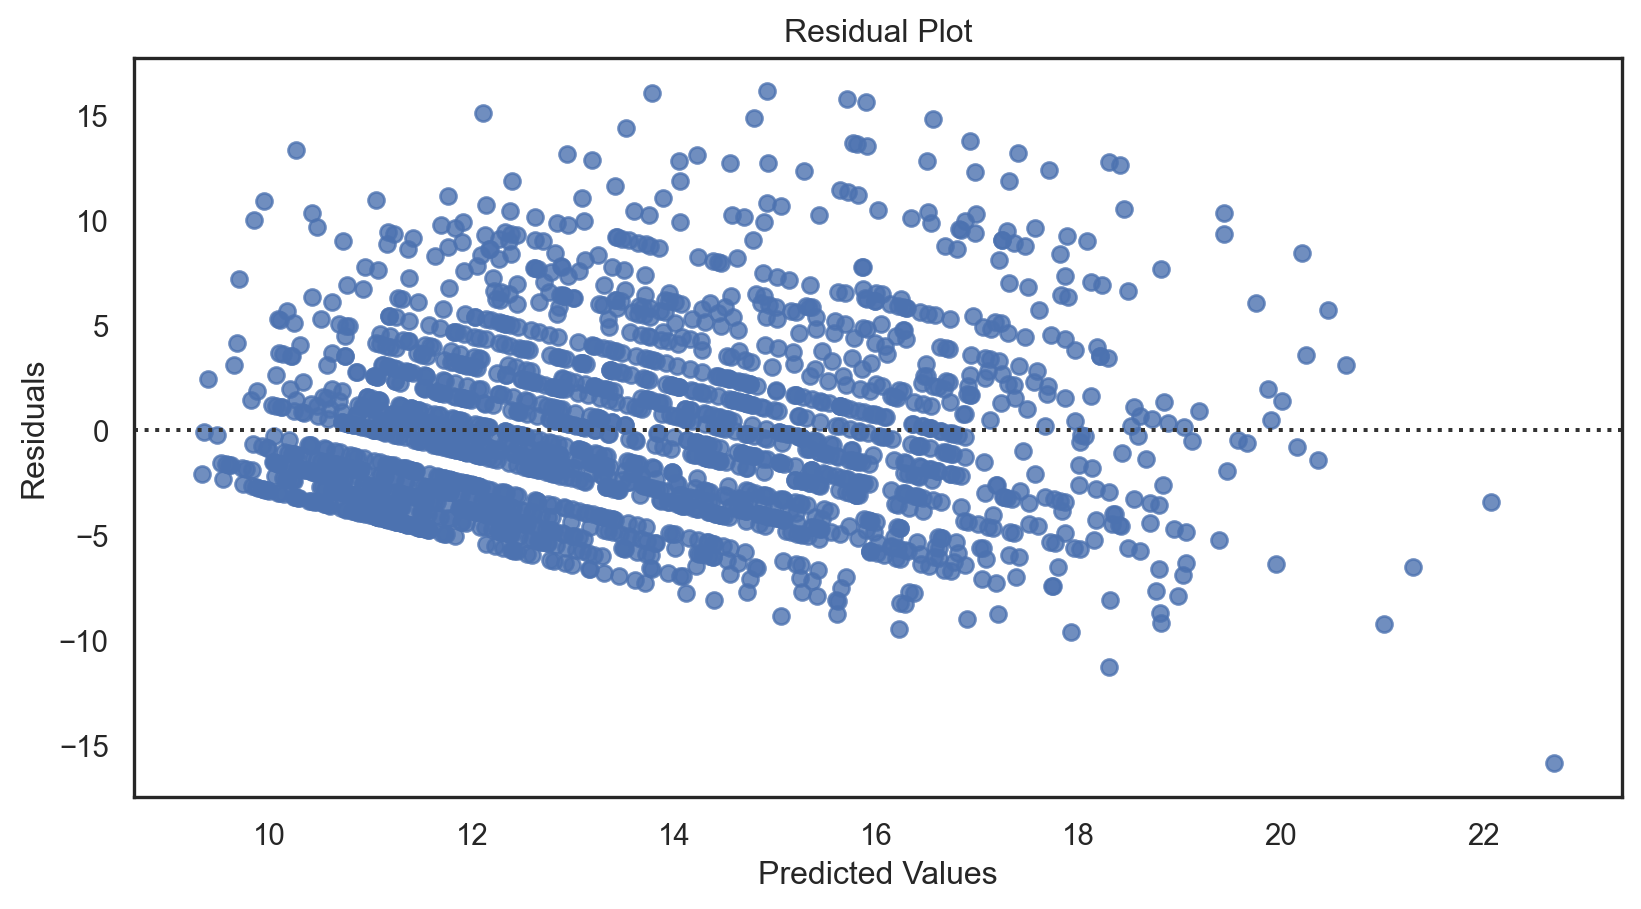

In [20]:
#| code-fold: true
X_test_with_const = sm.add_constant(X_test)
predictions = model.predict(X_test_with_const)
predictions = pd.to_numeric(predictions, errors='coerce')
residuals = y_test - predictions
residuals = pd.to_numeric(residuals, errors='coerce').fillna(0)

# Plotting the residuals
sns.residplot(x = predictions, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

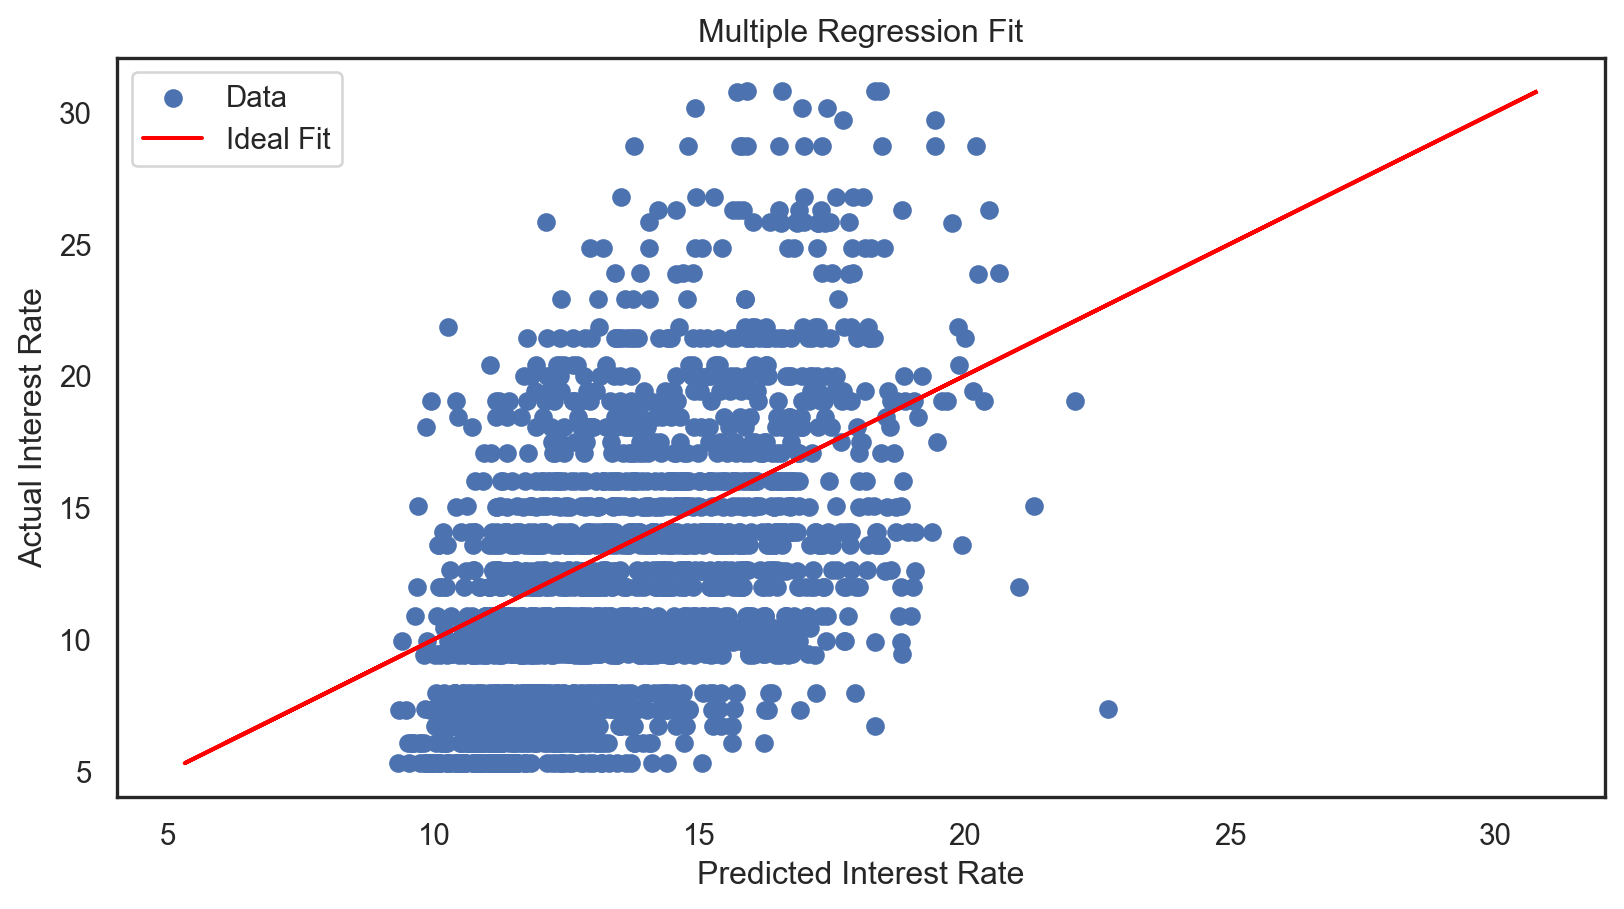

In [21]:
#| code-fold: true
plt.scatter(predictions, y_test, label = 'Data')
plt.plot(y_test, y_test, color = 'red', label = 'Ideal Fit')  

plt.xlabel('Predicted Interest Rate')
plt.ylabel('Actual Interest Rate')
plt.title('Multiple Regression Fit')
plt.legend()
plt.show()

In [22]:
#| code-fold: true
X = loans[['verified_income', 'debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'issue_month']]  
y = loans['interest_rate']  
X = pd.get_dummies(X, columns = ['verified_income', 'issue_month'], drop_first = True)
X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

X_train_with_const = X_train_with_const.astype(int)
X_test_with_const = X_test_with_const.astype(int)

model = sm.OLS(y_train, X_train_with_const).fit()

model_summary2 = model.summary2()
print(model_summary2)

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.191     
Dependent Variable:      interest_rate       AIC:                   46653.7930
Date:                    2025-08-20 11:30    BIC:                   46723.6650
No. Observations:        8000                Log-Likelihood:        -23317.   
Df Model:                9                   F-statistic:           210.4     
Df Residuals:            7990                Prob (F-statistic):    0.00      
R-squared:               0.192               Scale:                 19.937    
------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------
const                            4.0713   0.2319 17.5583 0.0000  3.6167 4.5258
debt_to_income                   0.0330   0.0033  9.8715 0.0000  0.0265 0.03

In [23]:
def best_subset_selection(X, y):
    results = []
    for k in range(1, len(X.columns) + 1):
        for combo in combinations(X.columns, k):
            X_subset = sm.add_constant(X[list(combo)].astype(int))
            model = sm.OLS(y, X_subset).fit()
            results.append({'model': model, 'predictors': combo})
    return results

subset_results = best_subset_selection(X_train, y_train)

In [24]:
best_aic = np.inf
best_model_1 = None

for result in subset_results:
    if result['model'].aic < best_aic:
        best_aic = result['model'].aic
        best_model_1 = result
        
print("Best Model Predictors:", best_model_1['predictors'])
print("Best Model AIC:", round(best_aic, 2))

Best Model Predictors: ('debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified')
Best Model AIC: 46650.23


In [25]:
best_bic = np.inf
best_model_2 = None

for result in subset_results:
    if result['model'].bic < best_bic:
        best_bic = result['model'].bic
        best_model_2 = result
        
print("Best Model Predictors:", best_model_2['predictors'])
print("Best Model BIC:", round(best_bic, 2))

Best Model Predictors: ('debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified')
Best Model BIC: 46706.13


In [26]:
best_r_sq_adj = -np.inf  
best_model_3 = None

for result in subset_results:
    if result['model'].rsquared_adj > best_r_sq_adj:  
        best_r_sq_adj = result['model'].rsquared_adj
        best_model_3 = result
        
print("Best Model Predictors:", best_model_3['predictors'])
print("Best Model Adjusted R-squared:", round(best_r_sq_adj, 2))

Best Model Predictors: ('debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified')
Best Model Adjusted R-squared: 0.19


In [27]:
#| code-fold: true
X = loans[['verified_income', 'debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'issue_month']]  
y = loans['interest_rate']  
X = pd.get_dummies(X, columns = ['verified_income', 'issue_month'], drop_first = True)
X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

X_train_with_const = X_train_with_const.astype(int)
X_test_with_const = X_test_with_const.astype(int)

model = sm.OLS(y_train, X_train_with_const).fit()

model_summary2 = model.summary2()
print(model_summary2)

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.191     
Dependent Variable:      interest_rate       AIC:                   46653.7930
Date:                    2025-08-20 11:30    BIC:                   46723.6650
No. Observations:        8000                Log-Likelihood:        -23317.   
Df Model:                9                   F-statistic:           210.4     
Df Residuals:            7990                Prob (F-statistic):    0.00      
R-squared:               0.192               Scale:                 19.937    
------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------
const                            4.0713   0.2319 17.5583 0.0000  3.6167 4.5258
debt_to_income                   0.0330   0.0033  9.8715 0.0000  0.0265 0.03

In [28]:
#| code-fold: true
lr = LinearRegression()

# Initialize SequentialFeatureSelector (SFS) for forward selection
sfs = SFS(lr, 
          k_features = 'best',  # Select the best number of features based on criterion
          forward = True,  # Forward selection
          floating = False,
          scoring = 'neg_mean_squared_error',  # Using negative MSE as scoring criterion
          cv = 0)  # No cross-validation

# Fit SFS on the training data
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_features = list(sfs.k_feature_names_)

# Convert the DataFrame to numeric to ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Select the features identified by forward selection
X_train_selected = X_train[selected_features]

# Fit the final Linear Regression model using selected features
final_model = lr.fit(X_train_selected, y_train)

# For AIC, BIC, and adjusted R-squared, use statsmodels
X_train_selected_with_const = sm.add_constant(X_train_selected)

# Ensure data type consistency
X_train_selected_with_const = X_train_selected_with_const.astype(float)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_selected_with_const).fit()

# Output the results
print("Forward Selection Results")
print("Selected predictors:", selected_features)
print("AIC:", round(model_sm.aic, 3))
print("BIC:", round(model_sm.bic, 3))
print("Adjusted R-squared:", round(model_sm.rsquared_adj, 3))

Forward Selection Results
Selected predictors: ['debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified', 'issue_month_Jan-2018', 'issue_month_Mar-2018']
AIC: 46034.53
BIC: 46104.402
Adjusted R-squared: 0.251


In [29]:
#| code-fold: true
# Initialize the linear regression model
lr = LinearRegression()

# Initialize SequentialFeatureSelector (SFS) for forward selection
sfs = SFS(lr, 
          k_features = 'best',  # Select the best number of features based on criterion
          forward = False,  # Forward selection
          floating = False,
          scoring = 'neg_mean_squared_error',  # Using negative MSE as scoring criterion
          cv = 0)  # No cross-validation

# Fit SFS on the training data
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_features = list(sfs.k_feature_names_)

# Convert the DataFrame to numeric to ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Select the features identified by forward selection
X_train_selected = X_train[selected_features]

# Fit the final Linear Regression model using selected features
final_model = lr.fit(X_train_selected, y_train)

# For AIC, BIC, and adjusted R-squared, use statsmodels
X_train_selected_with_const = sm.add_constant(X_train_selected)

# Ensure data type consistency
X_train_selected_with_const = X_train_selected_with_const.astype(float)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_selected_with_const).fit()

# Output the results
print("Backward Selection Results")
print("Selected predictors:", selected_features)
print("AIC:", round(model_sm.aic, 3))
print("BIC:", round(model_sm.bic, 3))
print("Adjusted R-squared:", round(model_sm.rsquared_adj, 3))

Backward Selection Results
Selected predictors: ['debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified', 'issue_month_Jan-2018', 'issue_month_Mar-2018']
AIC: 46034.53
BIC: 46104.402
Adjusted R-squared: 0.251


In [30]:
#| code-fold: true
def best_subset_cv(X, y, max_features=5):
    best_score = np.inf
    best_subset = None
    
    # Limiting the number of features for computational feasibility
    for k in range(1, max_features + 1):
        for subset in combinations(X.columns, k):
            # Define the model
            model = LinearRegression()
            
            # Perform k-fold cross-validation
            kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
            cv_scores = cross_val_score(model, X[list(subset)], y, cv = kf, scoring = 'neg_mean_squared_error')
            
            # Compute the average score
            score = -np.mean(cv_scores)  # Convert back to positive MSE
            
            # Update the best score and subset
            if score < best_score:
                best_score = score
                best_subset = subset
    
    return best_subset, best_score

# Start timing
start_time = time.time()

# Assuming X and y are already defined and preprocessed
best_subset, best_score = best_subset_cv(X, y)

# End timing
end_time = time.time()

# Calculate duration
duration = end_time - start_time

print("Best Subset:", best_subset)
print("Best CV Score (MSE):", best_score)
print("Computation Time: {:.2f} seconds".format(duration))

Best Subset: ('credit_util', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified')
Best CV Score (MSE): 18.664618422927752
Computation Time: 3.66 seconds


In [31]:
#| code-fold: true
# Initialize the linear regression model
lr = LinearRegression()

# Initialize SequentialFeatureSelector for forward selection with cross-validation
sfs = SFS(lr,
          k_features = 'best',  # 'best' or specify a number with ('1, 10') for range
          forward=True,
          floating=False,
          scoring = 'neg_mean_squared_error',
          cv = KFold(n_splits = 5, shuffle = True, random_state = 42))

# Start timing
start_time = time.time()

# Fit SFS on the training data
sfs.fit(X, y)

# End timing
end_time = time.time()

# Calculate duration
duration = end_time - start_time

# Get the names of the selected features
selected_features = list(sfs.k_feature_names_)

print("Selected predictors (forward selection):", selected_features)
print("Computation Time: {:.2f} seconds".format(duration))

Selected predictors (forward selection): ['debt_to_income', 'credit_util', 'bankruptcy', 'term', 'credit_checks', 'verified_income_Source Verified', 'verified_income_Verified']
Computation Time: 0.47 seconds


In [32]:
#| code-fold: true
# Convert the DataFrame to numeric to ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors = 'coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors = 'coerce').fillna(0)

# Select the features identified by forward selection
X_train_selected = X_train[selected_features]

# Fit the final Linear Regression model using selected features
final_model = lr.fit(X_train_selected, y_train)

# For AIC, BIC, and adjusted R-squared, use statsmodels
X_train_selected_with_const = sm.add_constant(X_train_selected)

# Ensure data type consistency
X_train_selected_with_const = X_train_selected_with_const.astype(float)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_selected_with_const).fit()

# Model results
model_summary2 = model_sm.summary2()
print("Forward selection best fit:\n")
print(model_summary2)

Forward selection best fit:

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.251     
Dependent Variable:    interest_rate       AIC:                   46030.6466
Date:                  2025-08-20 11:30    BIC:                   46086.5442
No. Observations:      8000                Log-Likelihood:        -23007.   
Df Model:              7                   F-statistic:           384.2     
Df Residuals:          7992                Prob (F-statistic):    0.00      
R-squared:             0.252               Scale:                 18.448    
----------------------------------------------------------------------------
                                Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
----------------------------------------------------------------------------
const                           2.1781   0.2216  9.8311 0.0000 1.7438 2.6125
debt_to_income                  0.0214   0.0032  6.5925 0.0000 0.0150 

In [33]:
#| code-fold: true
#| eval: false
from sklearn.impute import SimpleImputer
from feature_engine.imputation import CategoricalImputer

# Read in data
fuel_access = pd.read_csv('data/fuel_access.csv')
fuel_gdp = pd.read_csv('data/fuel_gdp.csv')
death_source = pd.read_csv('data/death_source.csv')

# Select relevant columns and rename for consistency if needed
fuel_access = fuel_access[['Entity', 'Year', 'access_clean_perc']]
fuel_gdp = fuel_gdp[['Entity', 'Year', 'GDP', 'popn']]
death_source = death_source[['Entity', 'Year', 'Death_Rate_ASP']]

# Ensure 'Year' is an integer
fuel_access['Year'] = fuel_access['Year'].astype(int)
fuel_gdp['Year'] = fuel_gdp['Year'].astype(int)
death_source['Year'] = death_source['Year'].astype(int)

# Merge datasets on 'Entity' and 'Year'
merged_data = pd.merge(fuel_access, fuel_gdp, on = ['Entity', 'Year'], how = 'inner')
merged_data = pd.merge(merged_data, death_source, on = ['Entity', 'Year'], how = 'inner')

# Check for missing values
print(merged_data.isnull().sum())

# Handle missing values if necessary (e.g., fill with mean or median, or drop)
num_imputer = SimpleImputer(strategy = 'mean')  # or 'median'
numerical_cols = merged_data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
merged_data[numerical_cols] = num_imputer.fit_transform(merged_data[numerical_cols])

merged_data.dropna()
merged_data['Entity'] = pd.factorize(merged_data['Entity'])[0]

# Final check for data types and missing values
print(merged_data.info())
print(merged_data.isnull().sum())

# Optional: Standardize/normalize numerical columns if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['access_clean_perc', 'GDP', 'popn']
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])
merged_data.to_csv()
# Define the predictor variables and the response variable
X = merged_data.drop(['Death_Rate_ASP'], axis = 1)  # Assuming 'Death_Rate_ASP' is the response variable
y = merged_data['Death_Rate_ASP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize LinearRegression model
lr = LinearRegression()

# Initialize SequentialFeatureSelector for forward selection with cross-validation
sfs = SFS(lr,
          k_features = 'best',  # 'best' or specify a number with ('1, 10') for range
          forward = True,  # Forward selection
          floating = False,  # Set to True for stepwise selection
          scoring = 'neg_mean_squared_error',  # Using negative MSE as scoring criterion
          cv = KFold(n_splits = 5, shuffle = True, random_state = 42))  # 5-fold cross-validation

# Fit SFS on the training data
sfs.fit(X_train, y_train)

# Get the names of the selected features
selected_features = list(sfs.k_feature_names_)

# Fit the final Linear Regression model using selected features
final_model = lr.fit(X_train[selected_features], y_train)

# Evaluate the model performance on the test set
from sklearn.metrics import mean_squared_error

y_pred = final_model.predict(X_test[selected_features])
mse = mean_squared_error(y_test, y_pred)

print("Selected predictors (forward selection):", selected_features)
print("Test MSE:", mse)

# Extracting predictor variables (X) and the target variable (y)
X = merged_data[selected_features]
Y = merged_data['Death_Rate_ASP']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

model_summary = model.summary2()
print(model_summary)